In [2]:
from IPython.core.display import display, HTML

import numpy as np
means = np.load("data/means.npy").astype(np.float32)
covs = np.load("data/covs.npy").astype(np.float32)
xicovs = np.load("data/xicovs.npy").astype(np.float32)
signals = np.load("data/signals.npy").astype(np.float32)
A = np.load("data/A.npy").astype(np.float32)
dt = np.load("data/dt.npy")[0]
C = np.load("data/C.npy").astype(np.float32)
D = np.load("data/D.npy").astype(np.float32)

coeffs = [C, A, D , dt]



from scipy.stats import norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from misc import *
import tensorflow as tf
%load_ext autoreload
%autoreload 2

tfsignals = tf.convert_to_tensor(signals)
tfxicovs = tf.convert_to_tensor(xicovs)[:-1]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
batched_signals = tf.stack(tf.split(tfsignals, 10)) 
batched_xicovs  = tf.stack(tf.split(tfxicovs, 10))

inputs = (batched_xicovs, batched_signals)

In [41]:
from RNN_models import *

model = RecModel(coeffs, batch_size=len(batched_signals))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1))

model.fit(x=inputs, y=batched_signals, epochs=100, batch_size=model.batch_size)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0787e-04
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0769e-04
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0752e-04
Epoch 4/100
1/1 [==============================] - 0s 964us/step - total_loss: 5.0739e-04
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0729e-04
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0723e-04
Epoch 7/100
1/1 [==============================] - 0s 984us/step - total_loss: 5.0717e-04
Epoch 8/100
1/1 [==============================] - 0s 978us/step - total_loss: 5.0711e-04
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - total_loss: 5.0704e-04
Epoch 10/100
1/1 [==============================] - 0s 991us/step - total_loss: 5.0696e-04
Epoch 11/100
1/1 [==============================] - 0s 962us/step - total_loss: 5.0688e-04
Epoch 12/100
1/1 [==

KeyboardInterrupt: 

In [42]:
model.trainable_variables

[<tf.Variable 'rec_model_10/rnn_10/stacked_rnn_cells_10/minimal_rnn_cell_10/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.18557718,  0.9924961 ],
        [-0.18697305,  0.24097972]], dtype=float32)>,
 <tf.Variable 'rec_model_10/rnn_10/stacked_rnn_cells_10/minimal_rnn_cell_10/recurrent_kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.00281123, -0.02341263],
        [-0.02238129, -0.03452218]], dtype=float32)>]

In [43]:
model.A

array([[ 0.  ,  1.  ],
       [-0.16,  0.  ]], dtype=float32)

In [61]:
series = ( tfxicovs[tf.newaxis,:10000,:,:], tfsignals[tf.newaxis,:10000,:] )

In [62]:
model.batch_size=1

In [63]:
predictions = model.rec_layer(series, initial_state=model.initial_state)

In [59]:
tfmeans = tf.convert_to_tensor(means.astype(np.float32))
Cxdt=tf.einsum('ij,kj->ki',model.C, tfmeans)*model.dt

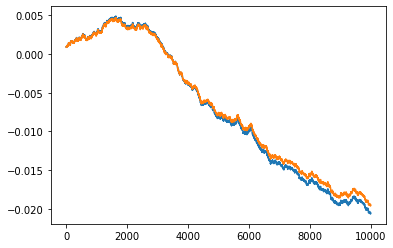

In [69]:
plt.plot(predictions[0][:,0])
plt.plot(Cxdt[:,0][:10000])